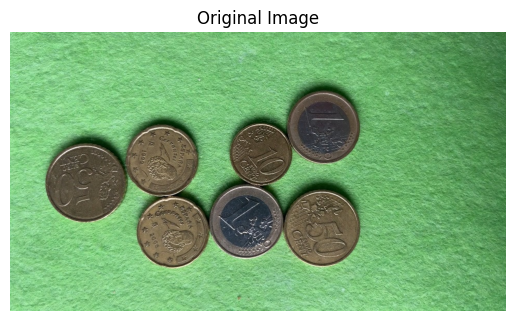

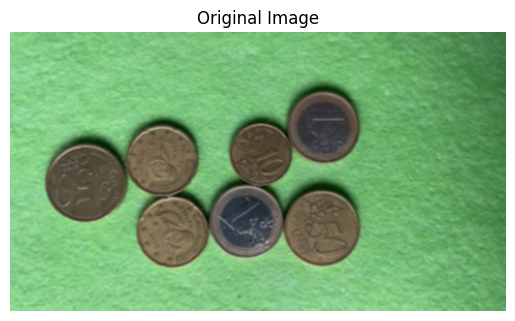

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(f'../data/images/coins.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()


image = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)
image = cv2.GaussianBlur(image, (3, 3), 1)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()



In [15]:
Laplacian = np.array([[0, 1, 0], 
                      [1, -4, 1], 
                      [0, 1, 0]])

Sobel_X = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])

Sobel_Y = np.array([[-1, -2, -1], 
                    [ 0,  0,  0], 
                    [ 1,  2,  1]])

Emboss = np.array([[-2, -1,  0],
                   [-1,  1,  1],
                    [ 0,  1,  2]])

Kirsch = np.array([[ 5,  5,  5], 
                   [-3,  0, -3], 
                   [-3, -3, -3]])

Prewitt_X = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

Prewitt_Y = np.array([[-1, -1, -1], 
                      [ 0,  0,  0], 
                      [ 1,  1,  1]])

In [16]:
kernels = {
    "Laplacian": Laplacian,
    "Sobel X": Sobel_X,
    "Sobel Y": Sobel_Y,
   "Emboss": Emboss,
   "Kirsch Compass": Kirsch,
   "Prewitt X": Prewitt_X,
   "Prewitt Y": Prewitt_Y
}

filtered_images = {}
for name, kernel in kernels.items():
     filtered = cv2.filter2D(image_rgb, -1, kernel)
     filtered_images[name] = filtered

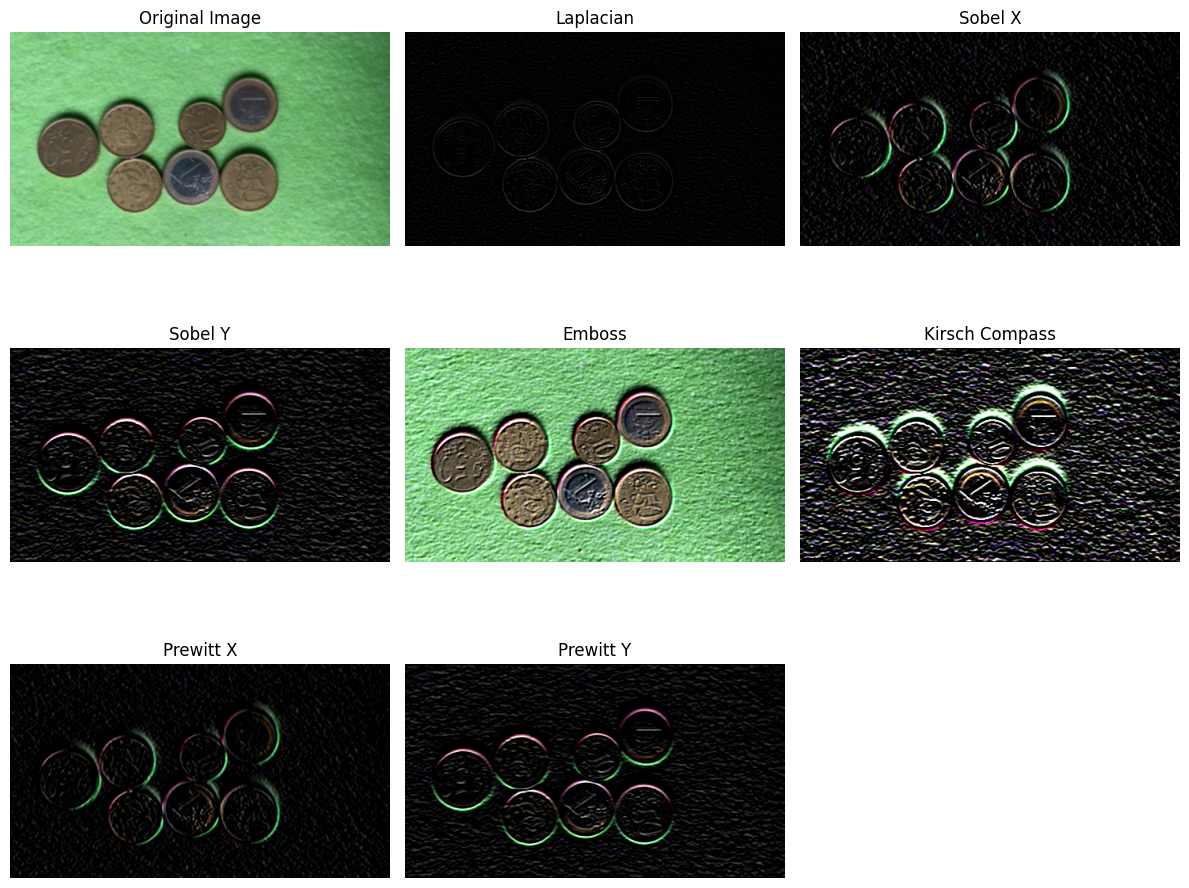

In [17]:
plt.figure(figsize=(12, 10))
titles = ['Original Image'] + list(kernels.keys())
images = [image_rgb] + list(filtered_images.values())

for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()